### $\textbf{QUIZ 1}$ 

##### Date: February 23, 2024

<br>

There are two questions in this quiz. Please answer each part carefully. 

Partial credit can be earned with correct derivations even if final answer has flaws.

Please rename your Jupyter Notebook file as "Name_FE5213_Quiz1" (e.g., ZhongxiZheng_FE5213_Quiz1) and submit your Jupyter Notebook file to Canvas > Assignment Folder.


<br>

---

##### $\textbf{Question 1}$ 

Suppose that a stock price at time $t$ obeys:

$$
\begin{align}
p_t & = d_t + \beta_t p_{t+1}, \qquad t = 0, 1, \dots, T,
\end{align}\tag{1}
$$

where $d_t$ is the dividend at time $t$ and $p_t$ is the price of stock at time $t$.

Let $T+1$ denote an integer date in which the company files for a bankruptcy, and let $p_{T+1}$ be the stock price at this date. 

Here, the integer $T$ is such that $T>20$ and the discount factor is described by:

$$
\begin{align}
\beta_t & =
\begin{cases}
\beta_1, \qquad t = 0, 1, \dots, 15, \\ 
\beta_2, \qquad t = 16, 17, 18, \\
\beta_3, \qquad t = 19, 20, \dots, T-1, \\
\beta_T, \qquad t = T.
\end{cases}
\end{align}    
$$

where $\beta_1, \beta_2, \beta_3, \beta_T \in (0,1)$.

<br>


$\textbf{a. }$ Please write a matrix equation

$$
A y = a + b
$$ 

that represents equations in (1) for $t=0,1,\dots,T$. Here, we note that:
* $A$ is a $(T+1)\times(T+1)$ matrix;
* $y$, $a$, $b$ are each  $(T+1)$ vectors.

Please map the sequences $\{p_t\}_{t=0}^T$, $\{d_t\}_{t=0}^T$, and the scalar $p_{T+1}$ into matrix $A$ and vectors $y$, $a$, and $b$. **Please do this part analytically and show formulas.**

$\textbf{b. }$ Please write a Python program that takes $T$, $p_{T+1}$, $\{d_t\}_{t=0}^T$ as inputs and forms $A$, $a$, and $b$.

$\textbf{c. }$ Please write a Python code to compute $A^{-1}$.

$\textbf{d. }$ Please use the formula $y = A^{-1}(a+b)$ to compute $\{p_t\}_{t=0}^T$ in Python. 

$\textbf{e. }$ Please write a Python program to compute $\{p_t\}_{t=0}^T$ when $T=25$, $p_{T+1}=1$, $d_t = (1+g)^t d_0$, $d_0=1$, $ g=0.025$, $\beta_1=0.9$, $\beta_2=0.95$, $\beta_3=0.99$, $\beta_T = 0.9$.

$\textbf{f. }$ Please repeat part $\textbf{e. }$ when $\beta_1=\beta_2=\beta_3=\beta_T=0.95$. What differences do you observe in the pattern of $\{p_t\}_{t=0}^T$?

<br>



##### Solution for Q1(a) -- you may choose to type out your solutions here or on a piece of paper. 






In [8]:
 
import numpy as np
import matplotlib.pyplot as plt
 

In [20]:
#beta1=.9
#beta2=.8
#beta3=.7
A = np.zeros((T+1,T+1))
for i in range(16):
    for j in range(16):
        if i == j:
            A[i, j] = 1
            A[i, j+1] = -beta1

for i in range(16,19):
    for j in range(16,19):
        if i == j:
             A[i, j] = 1
             A[i, j+1] = -beta2
for i in range(19,T):
    for j in range(19,T):
        if i == j:
            A[i, j] = 1
            A[i, j+1] = -beta3
A[T,T]=1


A
#this is rough working

array([[ 1. , -0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. , -0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. , -0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. , -0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. , -0.9,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. , -0.9,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. , -0.9,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],

In [26]:
# Solution for Q1(b)
# Code
# -- define functions
def create_matrix_new(T, p_nationalized, div_seq, beta1, beta2,beta3,betaT):
    #A = np.eye(T+1) + np.diag(-beta1 * np.concatenate([np.ones(16),np.zeros(T-16)]), k=1) + np.diag(-beta2 * np.concatenate([np.zeros(16),np.ones(3)]), k=1)+np.diag(-beta3 * np.concatenate([np.ones(T-20),np.zeros(T-16)]), k=1) 
    #A = np.zeros((T+1,T+1))
    a = div_seq
    b = np.zeros(T+1)
    b[-1] = betaT * p_nationalized
    A = np.zeros((T+1,T+1))
    for i in range(16):
        for j in range(16):
            if i == j:
                A[i, j] = 1
                A[i, j+1] = -beta1

    for i in range(16,19):
        for j in range(16,19):
            if i == j:
                 A[i, j] = 1
                 A[i, j+1] = -beta2
    for i in range(19,T):
        for j in range(19,T):
            if i == j:
                A[i, j] = 1
                A[i, j+1] = -beta3
        
    A[T,T]=1            
    
        
    a = div_seq
    b = np.zeros(T+1)
    b[-1] = betaT * p_nationalized
    return A, a, b



In [28]:
# Solution for Q1(c)
def inverseA(A):
    inv_A = np.linalg.inv(A)
    return inv_A
inverseA(A)


array([[1.        , 0.9       , 0.81      , 0.729     , 0.6561    ,
        0.59049   , 0.531441  , 0.4782969 , 0.43046721, 0.38742049,
        0.34867844, 0.3138106 , 0.28242954, 0.25418658, 0.22876792,
        0.20589113, 0.18530202, 0.14824162, 0.11859329, 0.09487463,
        0.06641224],
       [0.        , 1.        , 0.9       , 0.81      , 0.729     ,
        0.6561    , 0.59049   , 0.531441  , 0.4782969 , 0.43046721,
        0.38742049, 0.34867844, 0.3138106 , 0.28242954, 0.25418658,
        0.22876792, 0.20589113, 0.16471291, 0.13177032, 0.10541626,
        0.07379138],
       [0.        , 0.        , 1.        , 0.9       , 0.81      ,
        0.729     , 0.6561    , 0.59049   , 0.531441  , 0.4782969 ,
        0.43046721, 0.38742049, 0.34867844, 0.3138106 , 0.28242954,
        0.25418658, 0.22876792, 0.18301434, 0.14641147, 0.11712918,
        0.08199042],
       [0.        , 0.        , 0.        , 1.        , 0.9       ,
        0.81      , 0.729     , 0.6561    , 0.59049  

In [21]:
# Solution for Q1(d)
def give_price_seq(inv_A, a, b):
    n = inv_A @ ( a + b )
    return n


[15.33857584 15.93175094 16.53527882 17.14753202 17.76656336 18.39006345
 19.01531321 19.63913063 20.25781134 20.86706211 21.46192655 22.03670214
 22.58484753 23.09887912 23.57025553 23.98924881 24.3448007  23.32834328
 22.14349996 20.77566392 18.43304417 15.93913784 13.28603561 10.46542918
  7.46859134  4.28635494]


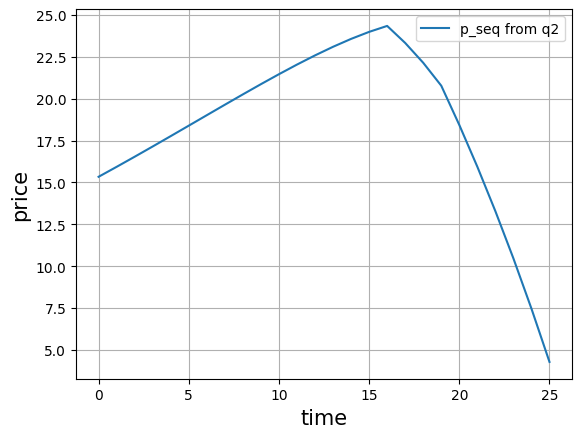

In [30]:
# Solution for Q1(e)

# -- define parameters
T1     = 25 
p_end1 = 1
beta1  = 0.9
beta2  = 0.95
beta3  = 0.99
betaT  = 0.9
g1     = 0.025

d_seq2 = np.zeros(T2+1)
d_seq2[0] = 1
for i in range(1,T2+1):
    d_seq2[i] = ((1+g2)**i)*d_seq2[0]
    
# -- obtain a solution    
A2, a2, b2 = create_matrix_new(T2, p_end2, d_seq2, beta1, beta2,beta3,betaT)
inv_A2   = inverseA(A2)
p_seq2   = give_price_seq(inv_A2, a2, b2)
print(p_seq2)

# -- plot
fig2, ax2 = plt.subplots()
ax2.plot(range(T2+1),p_seq2, label = 'p_seq from q2')
ax2.grid()
ax2.legend()
ax2.set_xlabel('time',fontsize=15)
ax2.set_ylabel('price',fontsize=15)
plt.show()

[25.46703905 25.75477795 26.00502942 26.21318886 26.37427775 26.48291736
 26.53330084 26.51916337 26.43375047 26.26978424 26.0194274  25.67424502
 25.22516385 24.66242898 23.97555772 23.15329065 22.18353945 21.05333143
 19.74875064 18.25487517 16.5557105  14.63411873 12.4717433  10.04892904
  7.34463714  4.33635494]


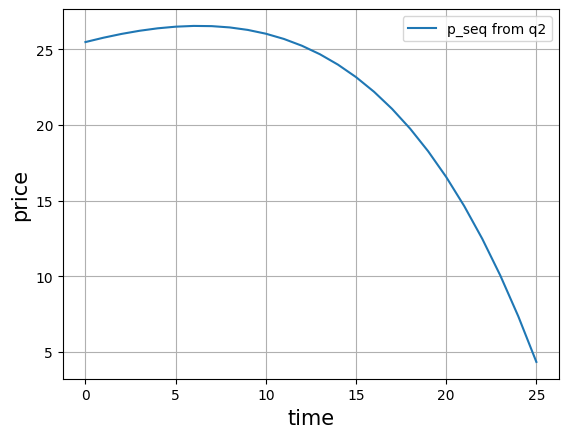

In [31]:
# Solution for Q1(f)
# -- define parameters
T1     = 25 
p_end1 = 1
beta1  = 0.95
beta2  = 0.95
beta3  = 0.95
betaT  = 0.95
g1     = 0.025

d_seq2 = np.zeros(T2+1)
d_seq2[0] = 1
for i in range(1,T2+1):
    d_seq2[i] = ((1+g2)**i)*d_seq2[0]
    
# -- obtain a solution    
A2, a2, b2 = create_matrix_new(T2, p_end2, d_seq2, beta1, beta2,beta3,betaT)
inv_A2   = inverseA(A2)
p_seq2   = give_price_seq(inv_A2, a2, b2)
print(p_seq2)

# -- plot
fig2, ax2 = plt.subplots()
ax2.plot(range(T2+1),p_seq2, label = 'p_seq from q2')
ax2.grid()
ax2.legend()
ax2.set_xlabel('time',fontsize=15)
ax2.set_ylabel('price',fontsize=15)
plt.show()

##### $\textbf{Question 2}$ 

Now assume that a stock price at time $t$ obeys:

$$
\begin{align}
p_t & = d_t + \beta p_{t+1}, \qquad t = 0, 1, \dots
\end{align}\tag{2}
$$



where $\{p_t\}$ and $\{d_t\}$ are again price and dividend sequences.

(Here $\ldots$ means that time goes on forever.)

The dividend process $\{d_t\}_{t=0}^\infty$ is described by: 

$$
d_t = G x_t, \tag{3}
$$

for some selector vector $G$ of length $(1\times n)$. Now, the state vector $x_t$ follows:

$$
x_{t+1} = \underbrace{A}_{n\times n} \cdot \underbrace{x_t}_{n\times 1}.\tag{4}
$$


<br>


$\textbf{a. }$ Suppose the sequence of $\{d_t\}$ satisfies $d_{t+1} = \phi_0 + \phi_1 d_t + \phi_2 d_{t-1} + z_t $, where $z_{t} = \delta_0 + \delta_1 t$ and $d_0, d_{-1}$ are given. Please map this process into equations (3)-(4) by specifying $A$, $x_t$, and $G$ explicitly. **Please do this analytically and show formulas.**

$\textbf{b. }$ Next, please write a Python program to simulate $\{d_t\}_{t=0}^{20}$ when $\phi_0 = 1.1$, $\phi_1 = 0.8$, $\phi_2 = -0.8$, $\delta_0=0.01$, $\delta_1=0.2$, $d_0 = d_{-1} = 1$. 

$\textbf{c. }$ Please verify that a solution of the infinite set of equations in (2) is $p_t = H x_t + c\beta^{-t}$, where $H = G(I - \beta A)^{-1}$ and $c$ is a scalar. **Please do this analytically and show formulas.**

<br>

##### Solution for Q2(a) -- you may choose to type out your solutions here or on a piece of paper. 


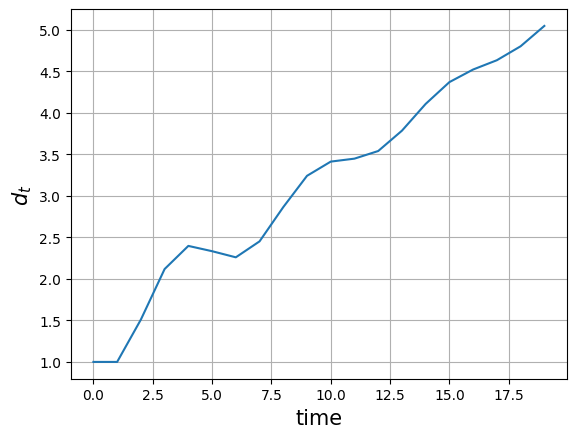

In [35]:
# Solution for Q2(b)
phi0=1.1
phi1=0.8
phi2=-0.8
sigma0=0.01
sigma1=0.2
T=20
#for loop method
dt = np.zeros((T))
dt[0]=1
dt[1]=1

for i in range(2,T):
   # print(i)
    dt[i]=phi0+phi1*dt[i-1]+phi2*dt[i-2]+sigma0+sigma1*i


#plot
fig, ax=plt.subplots()
ax.plot(range(T),dt)
ax.grid()
ax.set_xlabel('time',fontsize=15)
ax.set_ylabel('$d_t$',fontsize=15)
plt.show()



##### Solution for Q2(c) -- you may choose to type out your solutions here or on a piece of paper. 

